## Penguins

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin.png width=600 >


#### Columns in the dataset
- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- bill_length_mm: bill length (mm)
- bill_length_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- Sex: penguin sex

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin2.png width=600 >


In [67]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
path = "penguins.csv"

In [170]:
df = pd.read_csv(path)

In [171]:
data = df.copy()

In [172]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [73]:
island = pd.get_dummies(df["island"], drop_first=True)
island

,Dream,Torgersen
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
328,True,False
329,True,False
330,True,False
331,True,False


In [74]:
dummies = pd.get_dummies(df[['island', 'sex']], drop_first=True,dtype=int)
df_dummies = pd.concat([df, dummies], axis=1).drop(['island', 'sex'], axis=1)
df_dummies

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,0,1
329,Chinstrap,43.5,18.1,202,3400,1,0,0
330,Chinstrap,49.6,18.2,193,3775,1,0,1
331,Chinstrap,50.8,19.0,210,4100,1,0,1


In [75]:
dfSummary(df_dummies)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,species[object],1. Adelie2. Gentoo3. Chinstrap,146 (43.8%)119 (35.7%)68 (20.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbUBSF4atiQjORMAYvxovoYrsI7cYEa9CETNRBhu0wOe/l6ftWcBN+bGR0pn3fCxJ+tD6A45iq6rmqnlof0pH3fd9fWx8xotPlcvk1z/O59SG92LbtZZqm34L7fKd5ns+32+11WZa31se09ng8fq7rer7f709VJbZPdqqqWpbl7Xq9/ml9TCeeWx8wKg8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ig5VX28x9X6kB74P3yt07ZtL+u6nst7XFX18aZuVb23vmNENgj/skH4IpMpHymjf7L5lOrI0OsqS6m+DLuuspTqz+jrKk/YHfGjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZihl1Xjfg3fXdDr6sspfpig0CMdRUxHhCI6eFr1FfdQTSf8pnbHUfTKZ+53bH0MOUb7icX/s8DAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZimk75zO2OpfmUz9zuOGwQiDHlI+YvSryjSrcSH/QAAAAASUVORK5CYII="">",0(0.0%)
2,bill_length_mm[float64],Mean (sd) : 44.0 (5.5)min < med < max:32.1 < 44.5 < 59.6IQR (CV) : 9.1 (8.0),163 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC5klEQVR4nO3dsU7bQBjA8e8SkpoQ2URRYWPpwFCpg8c8RB+2j9CBB0AMXTqxIUFkhBs3juMuBYUF4jsf9nf5//ZLPPyVxB/H2dR1LUDfDbq+AGAfR11fAF4zxhyLyNjhJdZ1Xa/aup6+INQeMcYcz+fz73Ecz2xf4/HxcWmM+RFarITaL+M4jmeLxWKVJEnRdHGWZdHV1dXs/v5+LCKECr+SJCnOzs7+WC4/bvVieoKbKahAqFCBUKFCr3+jOo5qghzTHKrehuo6qgl1THOoehuqOIxquh7TOHwTxNvtdtT29YSgz6GKiNOoppMxjcs3QVmWUVVVX4ui+CkituOpIPU+VIWsvwlub29nNzc3k81mM/R1cVoRqic23wTL5TLIYX0bGE9BBUKFCoQKFYL9jVpV1UhEYmOM7UsMRGRrsY4RkwdBhprn+agsy28XFxfD4XDYeLtcVVWjPM+/TKfT34PBoGyylhGTH0GGul6vj6IomqRpWpyfny+brv8/JvqcpumvpusZMfkRZKjPTk5OrP5Y8DwmslnPiMkPbqagAqFCBUKFCoQKFbzeTDlufGYeiRfeQnXd+Mw8Ert8fqI6/Y8680js8j5Htd34zDwSu7iZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUCHoYycPkeNJ2719LCehBsT1pO0+P5aTUAPictJ214/lfA+hBsj2pG3p6LGc++BmCioQKlQgVKhAqFDh3Zsph1OjOTEarXkzVJdTozkxGm167xPV+tRoToxGm/aao9qcGs2J0WgTA3+8aOGJ3N72ChAqRMR9n4CI370ChAoRcX8it++9AoSKVxz2CUhVVbF42mJIqGiF7y2Ge4WaZVnU9I2fnp4iEZE8z6O7u7vJR67X+t5ar1tE5OHhYRpF0eTy8tKcnp7+bbJ2tVp9ur6+fvNnwz+sR5sOtRA5oAAAAABJRU5ErkJggg=="">",0(0.0%)
3,bill_depth_mm[float64],Mean (sd) : 17.2 (2.0)min < med < max:13.1 < 17.3 < 21.5IQR (CV) : 3.1 (8.7),79 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyUlEQVR4nO3cu47aQBSA4TNhQQMotrgIOl5gpRRINDTpUuZh06bbAqTUvAENQkJcBFkLY0iRpFhpw+LLLHOc/+uNXfzCOzPLMZfLRQDffbj3AwC3eLj3A+AlY0xdRGo5PuJ4uVyei3oeXxCqR4wx9U6n8zUIglbWz9jtdmtjzLeyxUqofqkFQdAaj8fPYRhGaS/ebrd2Mpm0VqtVTUQIFdfleH0H5/O5Gobhutfr/cx4+3rG67xGqAXL8/qO49gmSfIYRdGTiGQNtZQItXiZX9/z+bw1m80ap9Op4urhtCJUR8IwjNK+vtfrdSlf20VgHxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFdjw/4e85/VFP8//jlBfwXm9fwj1dZzXe4ZQr+C83h8spqAC36glkyRJVUQCY0yWy739vRWhlsjhcKjGcfxpMBhUKpVK6p+y+Px7K0ItkePx+GCtbQyHw6jf76/TXOv7760ItYSazWbqReAf3i4EWUxBBUKFCoQKFZz+jXrP8TQ57815vWechVrEeJrNZrM3xnwXkbRbLbbdbn8Jw7CZ5b6c1/vH5TdqrvE0i8Xi43Q6/TwYDLpp9wTjOLYi8jgajX50u91d2ntzXu8f59tTWc7LRX6fmWfdE/wbmrU2znrvtNfALe/3UbPsCRJa+bDqhwqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqvHnWzwwm+OBqqMxggi/e+kZlBhO8cNO/+TGDCffGYgoqECpU8P4//PF+cg5YE3E4ZI1QISL5B6yJuB2yRqgQkXwD1kTcD1kjVLyQY8CaiMMhayymoAKhQgVe/SiMy7HshIpCuB7LTqgohOux7ISKQrkay85iCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVbtrw3263Nu0H7/d7KyJyOBzscrlsvOf1Wu+t9bnzXn9LX78AxAaU7muyUu8AAAAASUVORK5CYII="">",0(0.0%)
4,flipper_length_mm[int64],Mean (sd) : 201.0 (14.0)min < med < max:172.0 < 197.0 < 231.0IQR (CV) : 23.0 (14.3),54 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACn0lEQVR4nO3dQY7aMBSA4edmQAGkRAgJdlygUhcsOUQP2yN0wQm

In [76]:
# sns.pairplot(df, hue="species")

In [77]:
# sns.pairplot(df_dummies, hue="species")

In [78]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [79]:
# sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species",
#                 col="sex", row="island", data=df);

In [80]:
# sns.relplot(x="body_mass_g", y="flipper_length_mm", hue="species",
#                 col="sex", row="island", data=df);

## pipeline

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

#joblib.dump(pipe, "penguins_pipe.pkl")

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colonne_categoriche = ["sex", "island"]

transformer = ColumnTransformer([
    ("encoding", OneHotEncoder(drop="first", dtype=int), colonne_categoriche)
    
], remainder="passthrough")



pipe = Pipeline(
    (
        ("transformer", transformer),
        ("random_forest", RandomForestClassifier(
                        bootstrap = True,
                        max_depth = None,
                        max_features = None,
                        min_samples_leaf = 1,
                        min_samples_split = 2,
                        n_estimators = 82
    )))
)

In [152]:
# Trasformazione dei dati
X_transformed = transformer.fit_transform(X)

# Controlla la forma e il contenuto
print(X_transformed.shape)
print(X_transformed[:5])

(333, 7)
[[1.00e+00 0.00e+00 1.00e+00 3.91e+01 1.87e+01 1.81e+02 3.75e+03]
 [0.00e+00 0.00e+00 1.00e+00 3.95e+01 1.74e+01 1.86e+02 3.80e+03]
 [0.00e+00 0.00e+00 1.00e+00 4.03e+01 1.80e+01 1.95e+02 3.25e+03]
 [0.00e+00 0.00e+00 1.00e+00 3.67e+01 1.93e+01 1.93e+02 3.45e+03]
 [1.00e+00 0.00e+00 1.00e+00 3.93e+01 2.06e+01 1.90e+02 3.65e+03]]


In [153]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [125]:
X_ = df_dummies.drop("species", axis=1)
y_ = df_dummies["species"]

---

In [126]:
df_dummies

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,0,1
329,Chinstrap,43.5,18.1,202,3400,1,0,0
330,Chinstrap,49.6,18.2,193,3775,1,0,1
331,Chinstrap,50.8,19.0,210,4100,1,0,1


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=667)

# pipe.fit(X_train, y_train)

In [147]:
RandomForestClassifier(
                        bootstrap = True,
                        max_depth = None,
                        max_features = None,
                        min_samples_leaf = 1,
                        min_samples_split = 2,
                        n_estimators = 82,
                        random_state=667
    ).fit(X_train, y_train).score(X_test, y_test)

ValueError: could not convert string to float: 'Torgersen'

---

In [154]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [177]:
data["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [176]:
data["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [155]:
X = data.drop("species", axis=1)
y = data["species"]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667)

In [157]:
pipe.fit(X_test,y_test)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>),
                                                  ['sex', 'island'])])),
                ('random_forest',
                 RandomForestClassifier(max_features=None, n_estimators=82))])

In [158]:
pipe.score(X_test, y_test)

1.0

In [164]:
pipe.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>),
                                                  ['sex', 'island'])])),
                ('random_forest',
                 RandomForestClassifier(max_features=None, n_estimators=82))])

In [165]:
cross_val_score(pipe, X, y, cv=5).mean()

0.9819086386250564

In [166]:
best_params_ = {'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 82}

In [167]:
pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('encoding',
                                    OneHotEncoder(drop='first',
                                                  dtype=<class 'int'>),
                                    ['sex', 'island'])])),
  ('random_forest',
   RandomForestClassifier(max_features=None, n_estimators=82))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('encoding',
                                  OneHotEncoder(drop='first',
                                                dtype=<class 'int'>),
                                  ['sex', 'island'])]),
 'random_forest': RandomForestClassifier(max_features=None, n_estimators=82),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights': None,
 'transformer__transformers': [('encod

In [168]:
import joblib
joblib.dump(pipe, "pipeline_penguins.pkl")


['pipeline_penguins.pkl']

---

## random forest 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [16]:
df_dummies

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,0,1
329,Chinstrap,43.5,18.1,202,3400,1,0,0
330,Chinstrap,49.6,18.2,193,3775,1,0,1
331,Chinstrap,50.8,19.0,210,4100,1,0,1


In [17]:
X = df_dummies.drop("species", axis=1)
y = df_dummies["species"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667)

In [19]:
model = RandomForestClassifier(random_state=667)

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1,2,3,4],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False]
}

In [ ]:
# gridsearchcv = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring="neg_mean_squared_error",
#     cv=5, 
#     verbose=2,
#     n_jobs=1
# )

In [22]:
gridsearchcv.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estim

KeyboardInterrupt: 

In [ ]:
# gridsearchcv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
df_dummies["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
df_dummies["species"] = df_dummies["species"].map({'Adelie':1, 'Gentoo':2, 'Chinstrap':3})

In [ ]:
X = df_dummies.drop("species", axis=1)
y = df_dummies["species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667)

In [ ]:
# param_grid = {
#     "n_estimators": [82, 85, 87],
#     "max_depth": [None],
#     "min_samples_split": [2], 
#     "min_samples_leaf": [1,2],
#     "max_features": [None],
#     "bootstrap": [True]
# }

# gridsearchcv = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring="accuracy",
#     cv=5, 
#     verbose=2,
#     n_jobs=1,
#     error_score="raise"
# )

# gridsearchcv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=82; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=82; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=82; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=82; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=82; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=85; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=85; 

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(max_features=None,
                                              n_estimators=82),
             n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': [None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2],
                         'n_estimators': [82, 85, 87]},
             scoring='accuracy', verbose=2)

In [ ]:
gridsearchcv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 82}

In [ ]:
best_params_ = {'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 82}

In [ ]:
#gridsearchcv.best_score_

0.9742830712303423

In [ ]:
# model = gridsearchcv.best_estimator_

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=82)

<BarContainer object of 7 artists>

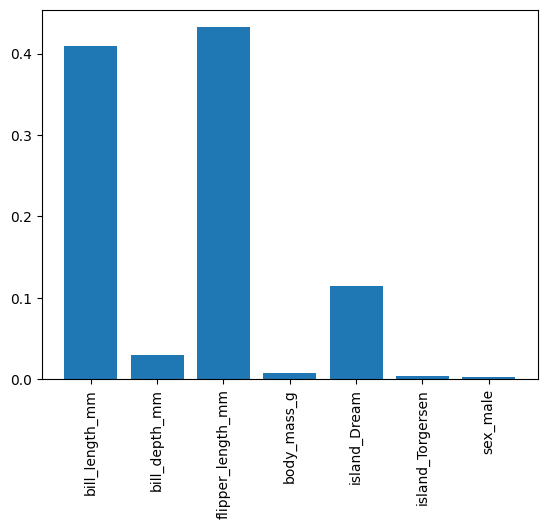

In [ ]:
#importanza_var = model.feature_importances_ 

# plt.xticks(rotation=90)
# plt.bar(X.columns, importanza_var)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.98

In [ ]:
cross_val_score(model, X, y, cv=5).mean()

0.9819086386250564

---

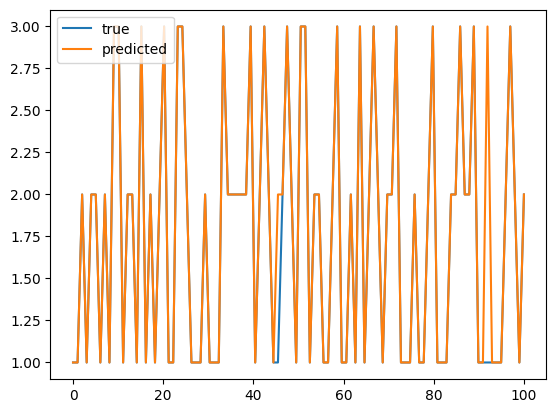

In [ ]:
lenght = len(y_test)
x = np.linspace(0,lenght,lenght)
plt.plot(x,y_test,label='true')
plt.plot(x,y_pred,label='predicted')
plt.legend()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

single_tree = model.estimators_[0]

dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

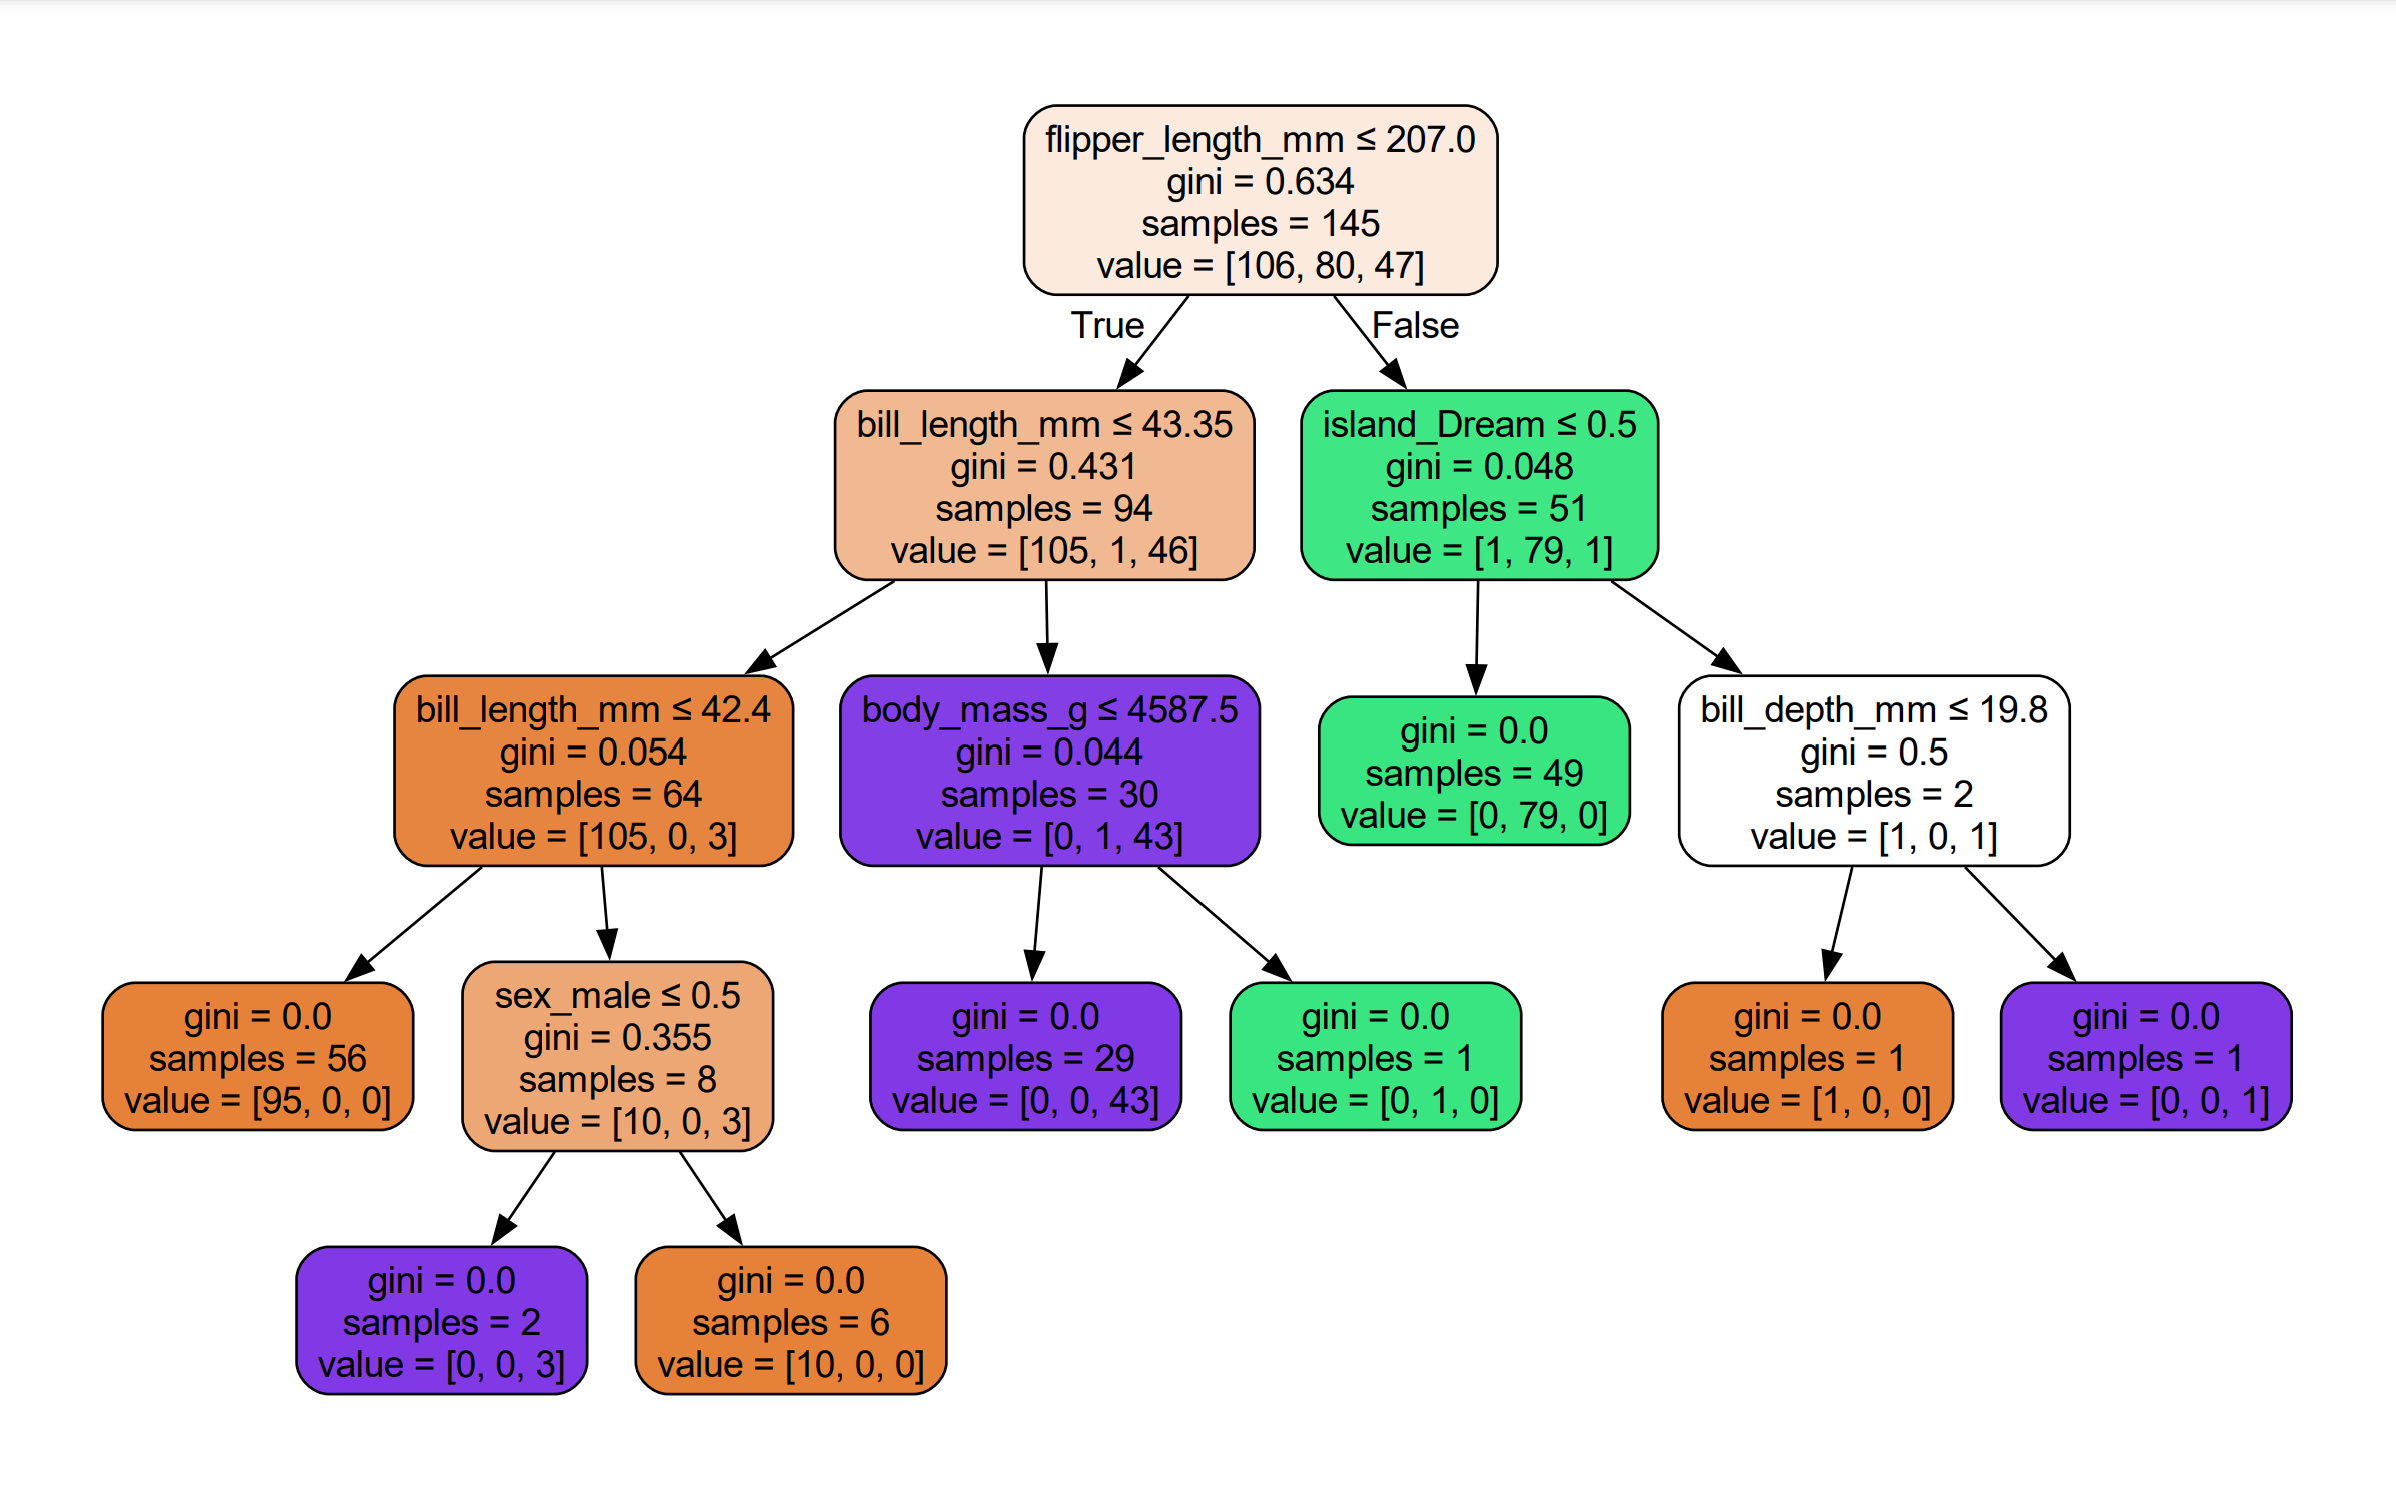

## logistic regression

In [ ]:
df_dummies

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,1,39.1,18.7,181,3750,0,1,1
1,1,39.5,17.4,186,3800,0,1,0
2,1,40.3,18.0,195,3250,0,1,0
3,1,36.7,19.3,193,3450,0,1,0
4,1,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,3,55.8,19.8,207,4000,1,0,1
329,3,43.5,18.1,202,3400,1,0,0
330,3,49.6,18.2,193,3775,1,0,1
331,3,50.8,19.0,210,4100,1,0,1
